In [124]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Kaggle dataset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors 

In [127]:
#reading in the dataset 
df = pd.read_csv('StudentPerformanceFactors.csv')

In [129]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [131]:
#checking for nulls 
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [133]:
#removing rows with null values
df = df.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [135]:
#encoding ordinal categorical values to numerical for values like high/low/medium, etc. 
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High':2, 'Near':0, 'Moderate':1, 'Far':2, 'High School': 0, 'College': 1, 'Postgraduate':2, 'Negative':0, 'Neutral':1, 'Positive':2}
ordinal_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home', 'Peer_Influence']
for col in ordinal_columns: 
    df[col] = df[col].map(ordinal_mapping)
    
#binary encoding for values like yes/no, male/female, etc. 
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes':1, 'No':0})
df['Internet_Access'] = df['Internet_Access'].map({'Yes':1, 'No':0})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['School_Type'] = df['School_Type'].map({'Public':1, 'Private':0})

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,0,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,0,0,70


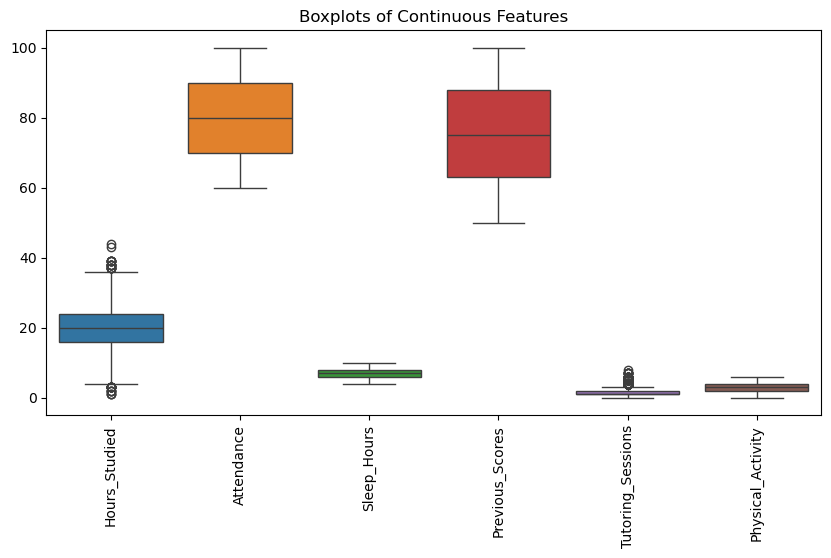

<Figure size 640x480 with 0 Axes>

In [137]:
#visualizations
plt.figure(figsize=(10, 5))
values=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
sns.boxplot(data=df[values])
plt.title('Boxplots of Continuous Features')
plt.xticks(rotation=90)
plt.show()
plt.savefig('boxplot2.png')

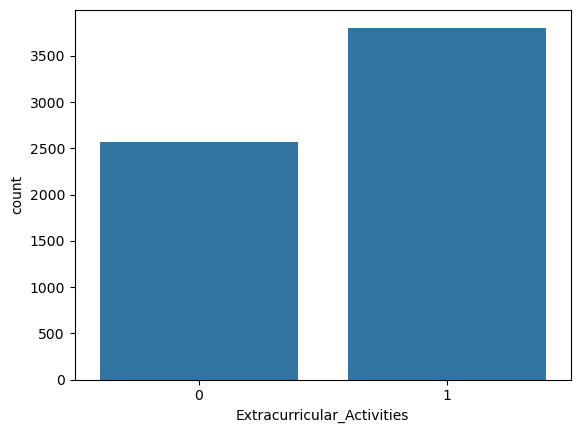

<Figure size 640x480 with 0 Axes>

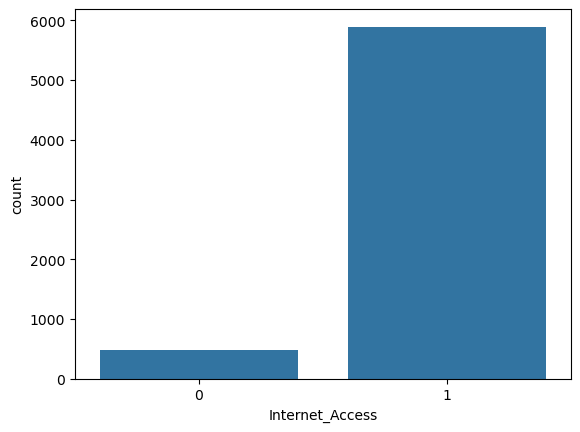

<Figure size 640x480 with 0 Axes>

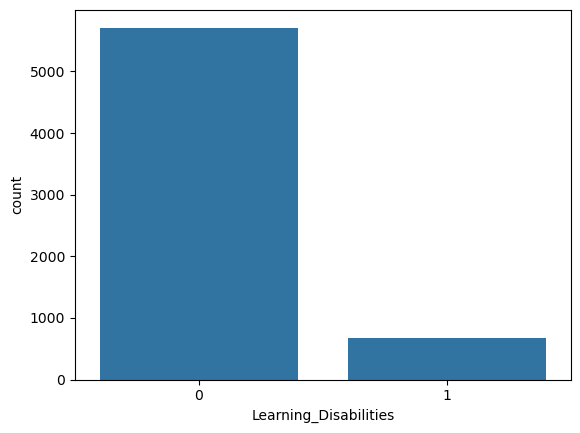

<Figure size 640x480 with 0 Axes>

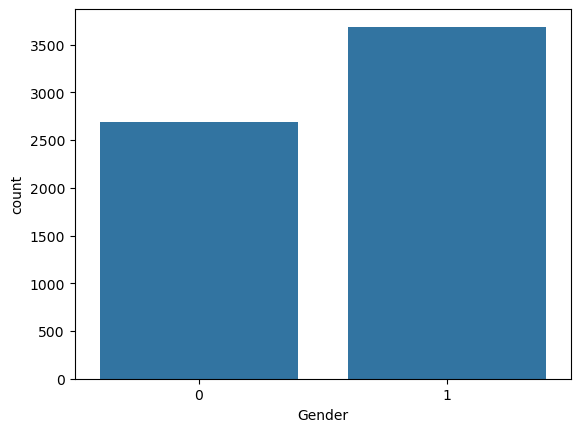

<Figure size 640x480 with 0 Axes>

In [138]:
#count plot for binary features
binary= ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities', 'Gender']
for feature in binary:
    plt.figure()
    sns.countplot(x=feature, data=df)
    plt.show()
    plt.savefig('countplot2')

In [173]:
#splitting data
X=df.drop('Exam_Score', axis=1)
y=df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [175]:
#random forest classifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#train forest model
randf = RandomForestClassifier(random_state=20, n_estimators=100, class_weight='balanced')
randf.fit(X_train, y_train)
y_prediction = randf.predict(X_test)
#evaluating accuracy
print('Random Forest Accuracy Score: ', accuracy_score(y_test, y_prediction))
print("Classification Report: \n", classification_report(y_test, y_prediction, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_prediction))
print("F1 Score: ", f1_score(y_test, y_prediction, average='weighted'))

Random Forest Accuracy Score:  0.24608150470219436
Classification Report: 
               precision    recall  f1-score   support

          57       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         7
          59       0.00      0.00      0.00        11
          60       0.00      0.00      0.00        13
          61       0.28      0.27      0.28        33
          62       0.34      0.36      0.35        47
          63       0.24      0.21      0.22        67
          64       0.37      0.24      0.29       114
          65       0.24      0.28      0.26       137
          66       0.22      0.33      0.27       143
          67       0.24      0.25      0.24       138
          68       0.23      0.24      0.23       156
          69       0.20      0.26      0.23       108
          70       0.27      0.28      0.28       108
          71       0.22      0.22      0.22        69
          72       0.30      0.21      0.25        61
     

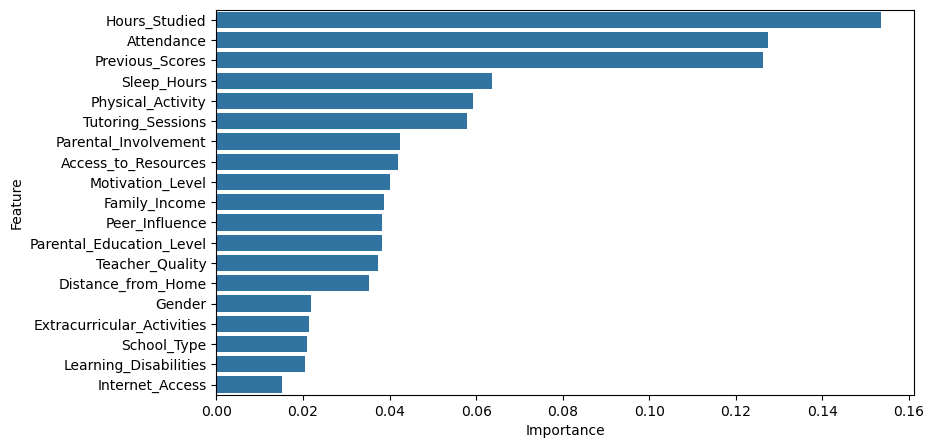

In [167]:
#features of most importance to exam scores
importances = randf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.savefig('featuresImportance.png')
plt.show()